# Step 1: Import Dataset

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('Churn_Modelling.csv')


In [52]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
df.shape

(10000, 14)

# Step 2: EDA

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [55]:
df.drop(columns=['Surname', 'RowNumber', 'CustomerId'], inplace=True)

In [56]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [58]:
#One-hot encoding
df = pd.get_dummies(df, columns = ['Geography','Gender'], drop_first = True)

In [59]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

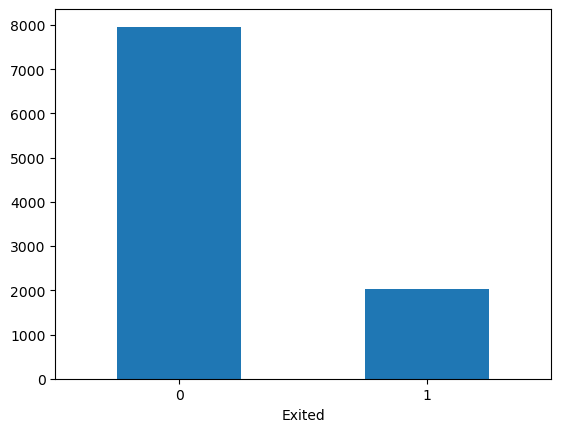

In [60]:
df["Exited"].value_counts().plot(kind = "bar")
plt.xticks(rotation=0)

In [61]:
# Balancing the data
not_Exited = df[df["Exited"] == 0]
Exited = df[df["Exited"] == 1]

print(not_Exited.shape[0])
print(Exited.shape[0])

7963
2037


In [62]:
not_Exited = not_Exited.sample(Exited.shape[0], random_state=42)

df_new = pd.concat([not_Exited , Exited])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

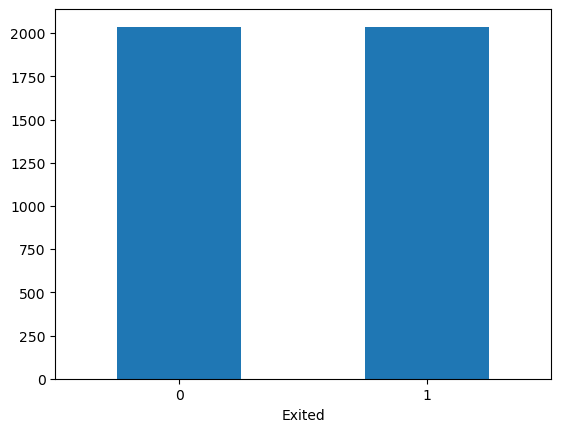

In [63]:
df_new["Exited"].value_counts().plot(kind = "bar")
plt.xticks(rotation=0)

<Axes: >

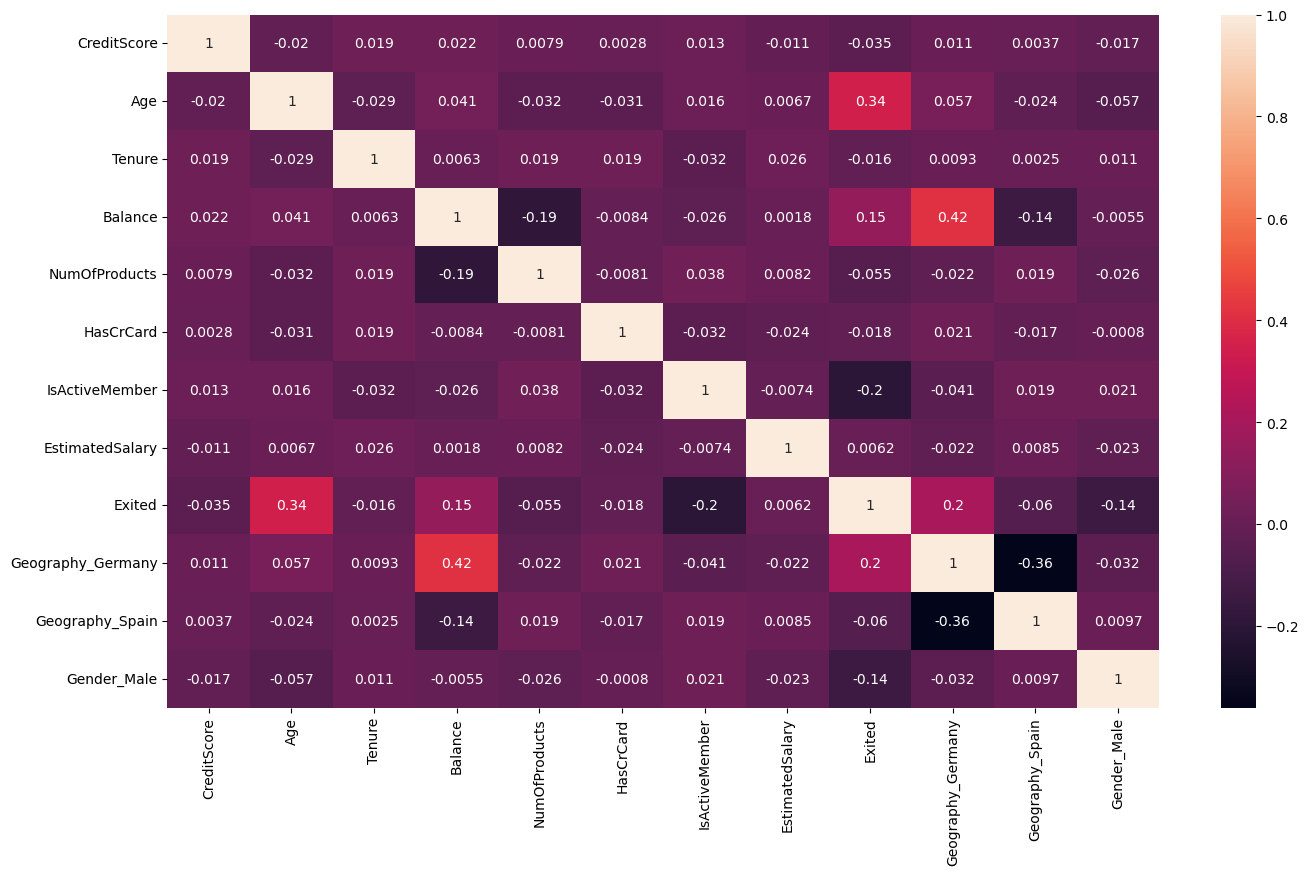

In [64]:
corr = df_new.corr()
plt.figure(figsize = (16, 9))
sns.heatmap(corr, annot = True)

In [65]:
from sklearn.preprocessing import StandardScaler
X = df_new.drop(columns = "Exited" , axis = 1)
y = df_new["Exited"]

In [66]:
columns = df_new.columns.tolist() 
columns.remove('Exited')

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X
df_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
8165,-0.437660,-0.391494,1.045749,1.187445,0.724545,0.643500,-0.925679,-0.208295,0,-0.663389,1.841219,0.977187
6409,0.350901,-0.766775,1.392065,-1.343806,0.724545,0.643500,1.080288,-1.080888,0,-0.663389,-0.543119,-1.023346
2157,0.975605,0.265248,-0.685832,-1.343806,0.724545,0.643500,1.080288,1.524534,0,-0.663389,-0.543119,-1.023346
1618,0.494275,-1.329697,1.045749,0.966753,0.724545,0.643500,-0.925679,-0.182420,0,-0.663389,-0.543119,0.977187
1633,-0.888267,-0.579134,0.699433,-1.343806,-0.760262,-1.554001,-0.925679,-0.905983,0,-0.663389,-0.543119,0.977187
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,-1.543694,0.077608,-0.685832,1.143714,-0.760262,0.643500,1.080288,-0.826631,1,1.507411,-0.543119,0.977187
9982,0.064151,0.452889,0.699433,0.900024,-0.760262,0.643500,-0.925679,0.243434,1,1.507411,-0.543119,-1.023346
9991,-0.529830,1.109631,-0.339516,0.102198,-0.760262,0.643500,-0.925679,-0.550197,1,-0.663389,-0.543119,-1.023346
9997,0.617168,-0.485314,0.699433,-1.343806,-0.760262,-1.554001,1.080288,-1.023637,1,-0.663389,-0.543119,-1.023346


# Step 3: Train model

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=18),
    'SVC': SVC(),
    'Naive Bayes': GaussianNB()
}

# Step 4: Evaluate the models

In [70]:
# Evaluate each model
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.720245,0.686528,0.712366,0.699208
Random Forest,0.752147,0.741477,0.701613,0.720994
SVC,0.763190,0.749304,0.723118,0.735978
Naive Bayes,0.727607,0.715517,0.669355,0.691667
